<a href="https://colab.research.google.com/github/IsabelaAyres/datascience/blob/main/MVP_data_analysis_and_best_practices/MVP_Data_Analysis_and_Best_Practices_Isabela_Ayres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Best Practices MVP

>**PUC-Rio**
>
>**Postgraduate Course in Data Science and Analytics**
>
>**Student: Isabela Ayres**


## 1. Problem Definition

---
Context of the problem, reason for choosing the dataset, and main information regarding the attributes.



---




### 1.1 Context

The "customer-centric" strategy has been increasingly explored and seen as an important tool for the growth and success of companies nowadays.

This approach means that **all decisions made by the company are based on the needs and desires of the customer**, placing them at the center of all company activities.

When customers feel that their needs are being met and that the company cares about them, they are more likely to remain loyal to the brand.

Therefore, a "customer-centric" approach is valuable because:


* It helps to retain customers and attract new consumers;
* Improves the customer experience, resulting in positive reviews;
* Identifies market opportunities and enables the development of tailored products and services;
* Improves internal processes, reducing costs and increasing profitability.

In this context, the aim of this MVP is to perform an exploratory analysis to identify the main attributes that lead a customer to rate their overall experience as satisfactory. The goal is to assist the company in concentrating efforts and investments in what adds the most value to the customer, aiming for greater efficiency, cost reduction, and increased profitability.





### 1.1 The dataset

The dataset used in this project will be the **Passenger Satisfaction**, regarding a survey conducted in the United States that measures the satisfaction level with airlines.


The dataset can be accessed [here](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction).

### 1.3 Attributes

The dataset has 129,880 instances and 24 attributes, as described below. 

1. **Satisfaction**: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)
2. **Age**: The actual age of the passengers
3. **Gender**: Gender of the passengers (Female, Male)
4. **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. **Customer Type**: The customer type (Loyal customer, disloyal customer)
7. **Flight distance**: The flight distance of this journey
8. **Inflight wifi service**: Satisfaction level of the inflight wifi service
9. **Ease of Online booking**: Satisfaction level of online booking
10. **Online boarding**: Satisfaction level of online boarding
11. **Inflight entertainment**: Satisfaction level of inflight entertainment
12. **Food and drink**: Satisfaction level of Food and drink
13. **Seat comfort**: Satisfaction level of Seat comfort
14. **On-board service**: Satisfaction level of On-board service
15. **Leg room service**: Satisfaction level of Leg room service
16. **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient
17. **Baggage handling**: Satisfaction level of baggage handling
18. **Gate location**: Satisfaction level of Gate location
19. **Cleanliness**: Satisfaction level of Cleanliness
20. **Check-in service**: Satisfaction level of Check-in service
21. **Departure Delay in Minutes**: Minutes delayed when departure
22. **Arrival Delay in Minutes**: Minutes delayed when Arrival
23. **Online support**: Online support
24. **ID**: Identification number

Note: for the Satisfaction Level attributes, the scores range from 1 to 5, with 0 being not applicable.



## 2. Data pre-processing 

---
Data pre-processing involves understanding the data and detecting possible gaps in the analysis through the evaluation of attribute types, outliers identification or missing values, among other relevant factors.

This step is crucial to recognize the needs for data treatment, enabling a more accurate and efficient exploratory analysis.


---



### 2.1 Imports

Starting with importing the libraries to be used.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option


# Configuration to not display warnings
import warnings
warnings.filterwarnings("ignore")

### 2.2 Load

We will use the Pandas package (Python Data Analysis Library) to load a .csv file with header available online.

In [2]:
# Loading a CSV file using Pandas through a URL

# Provide the URL to import the dataset
url = "https://raw.githubusercontent.com/IsabelaAyres/datascience/main/MVP_data_analysis_and_best_practices/satisfaction.csv"

# Adjusts the column header to standardized names
col = ['id','Satisfaction','Gender','CustomerType','Age','TypeTravel','Class','FlightDistance','Seatcomfort','DepartureArrivalTimeConvenient','FoodDrink','GateLocation','InflightWifiService',	'InflightEntertainment','OnlineSupport','EaseOnlinebooking','OnboardService','LegRoomService','BaggageHandling','CheckinService','Cleanliness','OnlineBoarding','DepartureDelayMinutes','ArrivalDelayMinutes']

# Reads the file using the provided columns
df_original = pd.read_csv(url,
                          names=col,
                          skiprows=1,
                          delimiter=',')

To verify the existence of possible errors in the dataset loading, it is recommended to analyze the first and last 10 rows. It can help to identify inconsistencies and discrepancies, allowing the adoption of corrective measures to ensure the quality and reliability of the results obtained from the dataset.

In [3]:
# Show the first 10 rows of the dataset
df_original.head(10)

,id,Satisfaction,Gender,CustomerType,Age,TypeTravel,Class,FlightDistance,Seatcomfort,DepartureArrivalTimeConvenient,...,OnlineSupport,EaseOnlinebooking,OnboardService,LegRoomService,BaggageHandling,CheckinService,Cleanliness,OnlineBoarding,DepartureDelayMinutes,ArrivalDelayMinutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,32864,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,7243,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [4]:
# Show the last 10 rows of the dataset
df_original.tail(10)

,id,Satisfaction,Gender,CustomerType,Age,TypeTravel,Class,FlightDistance,Seatcomfort,DepartureArrivalTimeConvenient,...,OnlineSupport,EaseOnlinebooking,OnboardService,LegRoomService,BaggageHandling,CheckinService,Cleanliness,OnlineBoarding,DepartureDelayMinutes,ArrivalDelayMinutes
129870,22432,satisfied,Female,disloyal Customer,70,Personal Travel,Eco,1674,5,4,...,5,5,3,2,4,5,4,5,54,46.0
129871,91851,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,...,2,2,4,5,4,4,3,2,9,0.0
129872,41573,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,...,4,4,5,4,4,3,4,4,4,0.0
129873,46936,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,...,3,3,5,2,5,3,5,3,7,NaN
129874,53969,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0
129879,84566,neutral or dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,...,3,4,5,5,5,3,3,3,185,186.0


Upon verifying the first and last 10 rows of the dataset, as well as its size (as shown in the command below), it can be noticed that all instances and attributes were successfully loaded.

In [5]:
# Show the dimensions of the dataset
print(df_original.shape)

(129880, 24)


It is also important to verify the general information present in the dataset.

In [6]:
# Shows the dataset information
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              129880 non-null  int64  
 1   Satisfaction                    129880 non-null  object 
 2   Gender                          129880 non-null  object 
 3   CustomerType                    129880 non-null  object 
 4   Age                             129880 non-null  int64  
 5   TypeTravel                      129880 non-null  object 
 6   Class                           129880 non-null  object 
 7   FlightDistance                  129880 non-null  int64  
 8   Seatcomfort                     129880 non-null  int64  
 9   DepartureArrivalTimeConvenient  129880 non-null  int64  
 10  FoodDrink                       129880 non-null  int64  
 11  GateLocation                    129880 non-null  int64  
 12  InflightWifiServ

### 2.3 Missing Values Treatment and Data Cleaning

By observing the relationship of missing values in the dataset, it can be noted that the attribute **ArrivalDelayMinutes**, referring to the delay time in minutes upon arrival at the destination, has approximately 0.30% (393 records) of missing data.

These records will be excluded in the analysis due to their low representativeness in relation to the total.

In [7]:
# Checking null values in the dataset
df_original.isnull().sum()

id                                  0
Satisfaction                        0
Gender                              0
CustomerType                        0
Age                                 0
TypeTravel                          0
Class                               0
FlightDistance                      0
Seatcomfort                         0
DepartureArrivalTimeConvenient      0
FoodDrink                           0
GateLocation                        0
InflightWifiService                 0
InflightEntertainment               0
OnlineSupport                       0
EaseOnlinebooking                   0
OnboardService                      0
LegRoomService                      0
BaggageHandling                     0
CheckinService                      0
Cleanliness                         0
OnlineBoarding                      0
DepartureDelayMinutes               0
ArrivalDelayMinutes               393
dtype: int64

Before any treatment, a copy of the dataset will be made to preserve the original data.

In [8]:
# Saves a new dataset
df = df_original

Checking for null values in the dataset.

<Axes: >

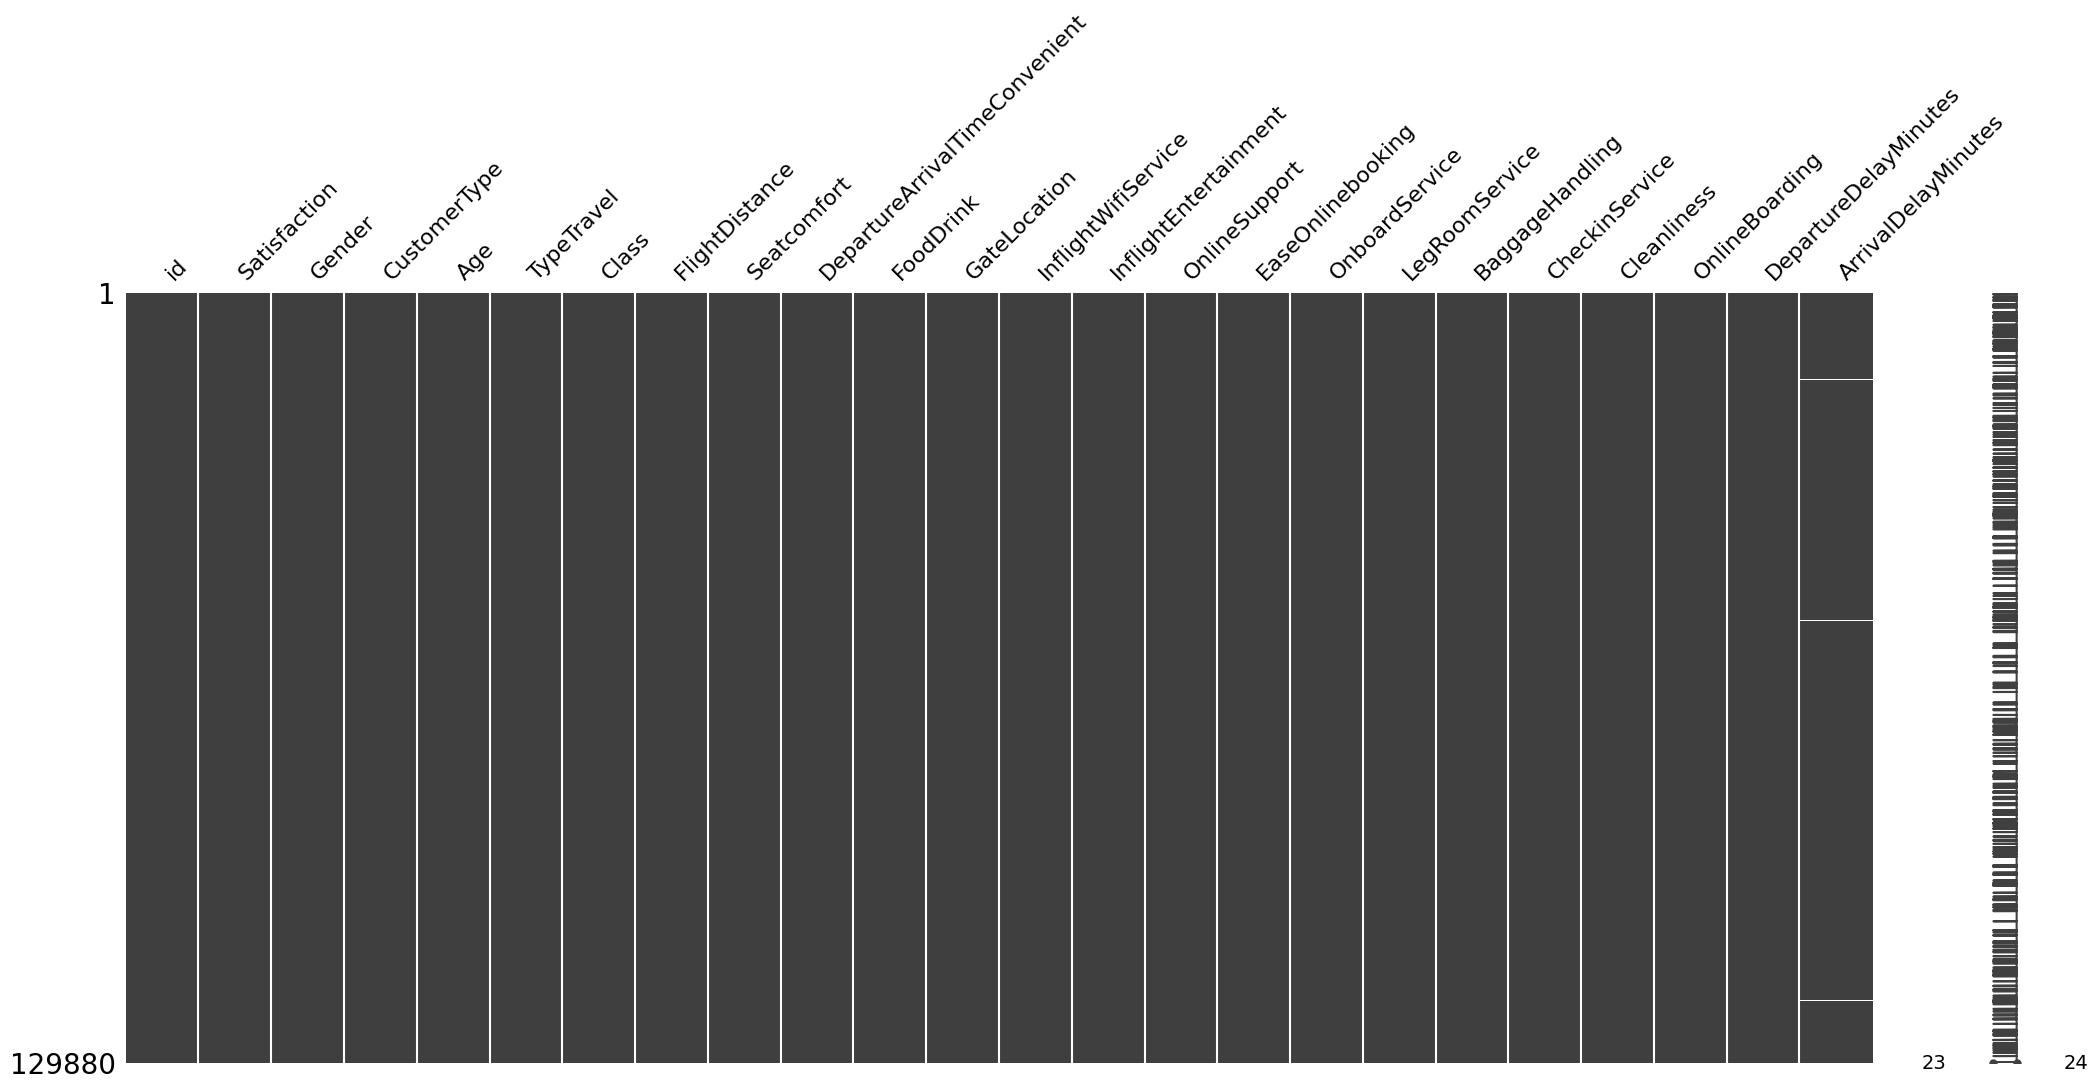

In [9]:
# Displays a matrix visualization of nullity in the dataset
ms.matrix(df)

The following command deletes missing values from the respective attribute.

In [10]:
# Deletes missing values from the previously defined attribute
df = df.dropna(subset=['ArrivalDelayMinutes'])

By viewing the matrix, it can be noted that all missing values have been properly handled.

<Axes: >

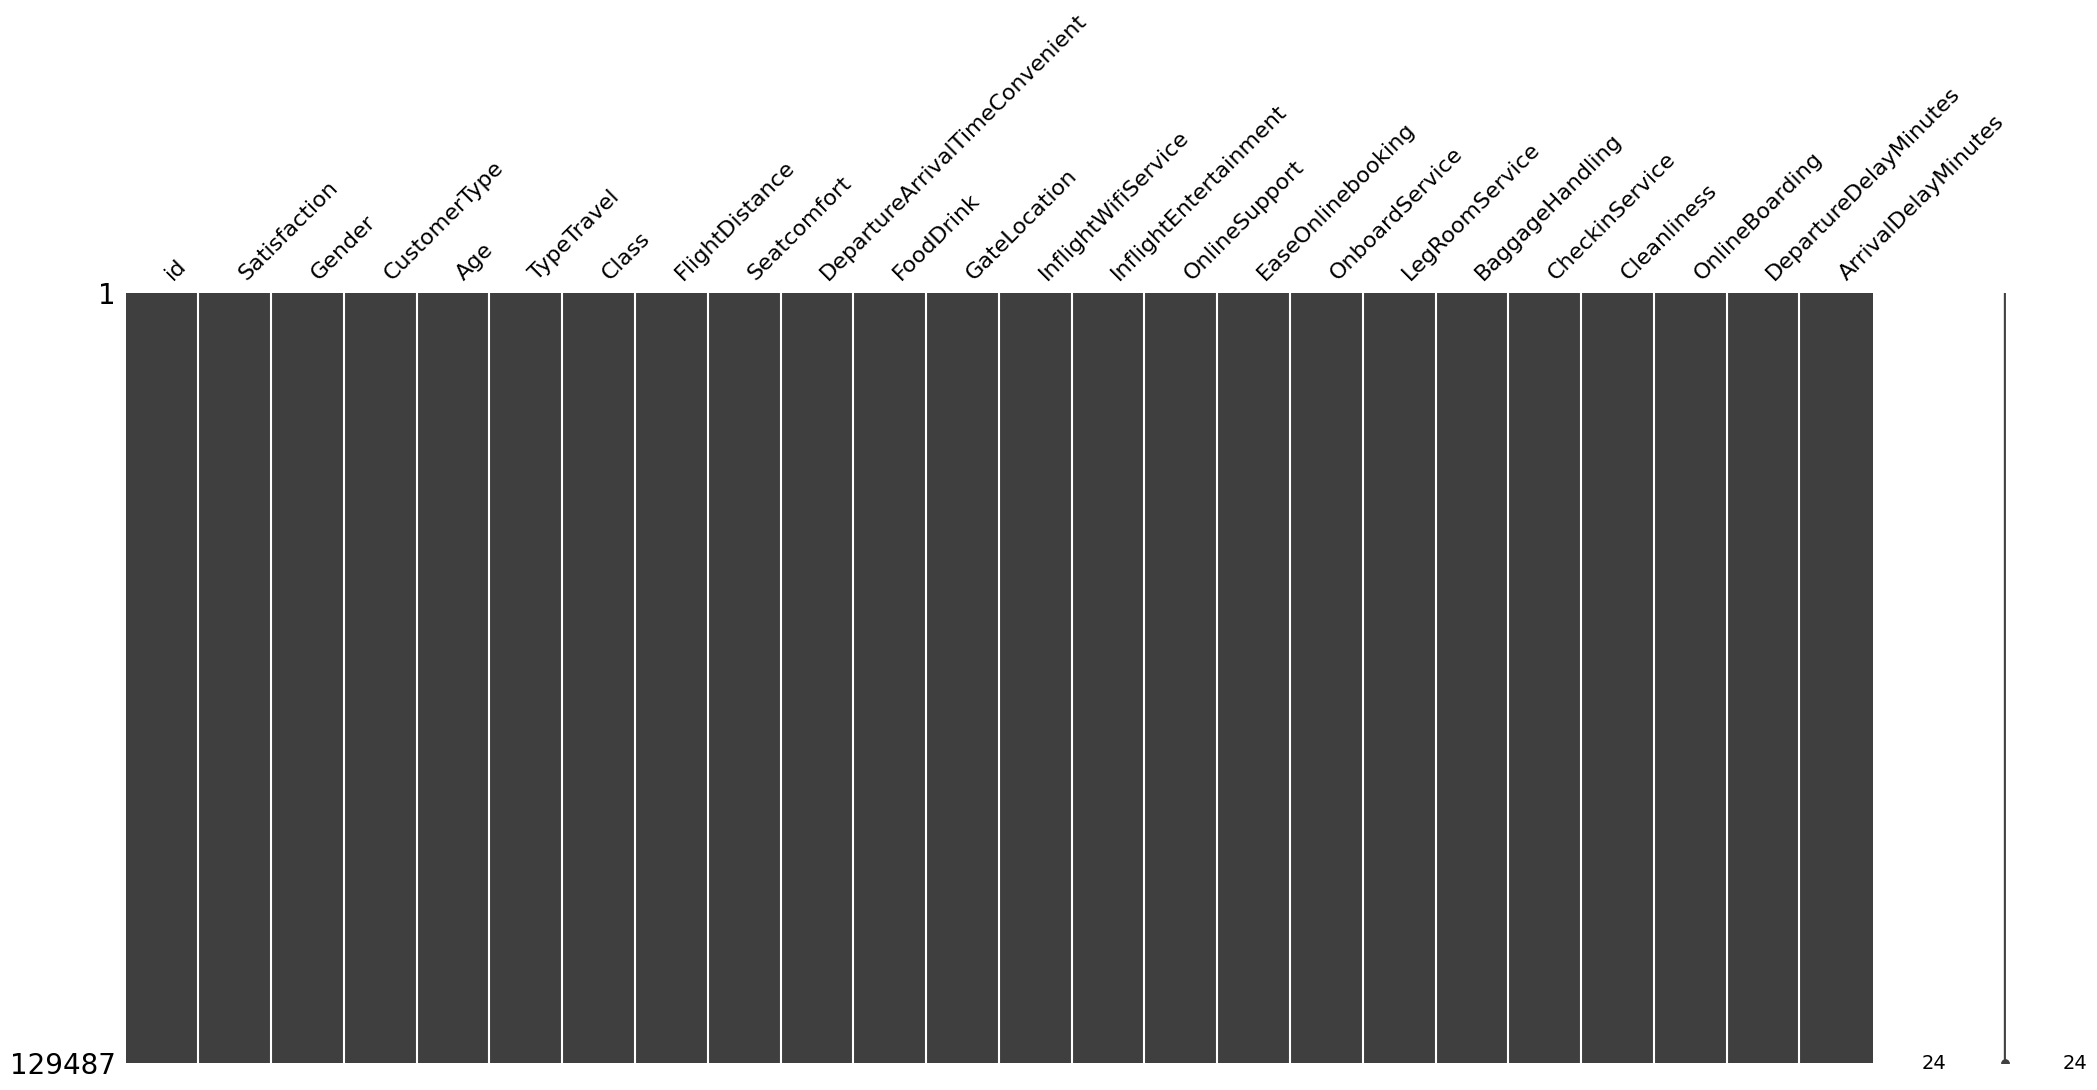

In [11]:
# Displays a matrix visualization of nullity in the dataset
ms.matrix(df)

As mentioned earlier, satisfaction level attributes range from 1 to 5, with 0 being non-applicable. To ensure a more accurate interpretation and avoid possible ambiguities in the results, 0 values will be converted to non-applicable.

In [12]:
# Replaces 0 values with non-applicable
df.Seatcomfort = df.Seatcomfort.replace(0, np.nan)
df.DepartureArrivalTimeConvenient = df.DepartureArrivalTimeConvenient.replace(0, np.nan)
df.FoodDrink = df.FoodDrink.replace(0, np.nan)
df.GateLocation = df.GateLocation.replace(0, np.nan)
df.InflightWifiService = df.InflightWifiService.replace(0, np.nan)	
df.InflightEntertainment = df.InflightEntertainment.replace(0, np.nan)
df.OnlineSupport = df.OnlineSupport.replace(0, np.nan)	 
df.EaseOnlinebooking = df.EaseOnlinebooking.replace(0, np.nan)
df.OnboardService = df.OnboardService.replace(0, np.nan)
df.LegRoomService = df.LegRoomService.replace(0, np.nan)
df.BaggageHandling = df.BaggageHandling.replace(0, np.nan)
df.CheckinService = df.CheckinService.replace(0, np.nan)
df.Cleanliness = df.Cleanliness.replace(0, np.nan)	
df.OnlineBoarding = df.OnlineBoarding.replace(0, np.nan)

### 2.4 Data type conversion

Considering the variable type of the attributes, it is possible to convert the attribute **id**, which represents the passenger identification code, from a numerical format to a textual format. This conversion can help avoid possible errors in the analysis.


In [13]:
# Converts to a textual format
df.id = df.id.astype(object)

With the command below, it's possible to observe that the conversion was successfully performed.

In [14]:
# Check the data type of each attribute
df.dtypes

id                                 object
Satisfaction                       object
Gender                             object
CustomerType                       object
Age                                 int64
TypeTravel                         object
Class                              object
FlightDistance                      int64
Seatcomfort                       float64
DepartureArrivalTimeConvenient    float64
FoodDrink                         float64
GateLocation                      float64
InflightWifiService               float64
InflightEntertainment             float64
OnlineSupport                     float64
EaseOnlinebooking                 float64
OnboardService                    float64
LegRoomService                    float64
BaggageHandling                     int64
CheckinService                    float64
Cleanliness                       float64
OnlineBoarding                    float64
DepartureDelayMinutes               int64
ArrivalDelayMinutes               

### 2.5 Outlier Treatment

Treatment of outliers (values that significantly differ from the others) is important to ensure that the data is within an acceptable range and adequately represents the reality of the studied context.

Upon analyzing the information present in the statistical summary of the dataset, no possible outliers were identified.

In [15]:
# Generate a statistical summary of the dataset (mean, standard deviation, minimum, maximum, and quartiles)
df.describe()

,Age,FlightDistance,Seatcomfort,DepartureArrivalTimeConvenient,FoodDrink,GateLocation,InflightWifiService,InflightEntertainment,OnlineSupport,EaseOnlinebooking,OnboardService,LegRoomService,BaggageHandling,CheckinService,Cleanliness,OnlineBoarding,DepartureDelayMinutes,ArrivalDelayMinutes
count,129487.000000,129487.000000,124706.000000,122843.000000,123565.000000,129485.000000,129357.000000,126519.000000,129486.000000,129469.000000,129482.000000,129045.000000,129487.000000,129486.000000,129482.000000,129473.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.947412,3.152007,2.988710,2.990424,3.252425,3.463124,3.519994,3.472654,3.465277,3.498059,3.695460,3.340755,3.706029,3.352908,14.643385,15.091129
std,15.117597,1026.884131,1.301429,1.395942,1.332404,1.305874,1.315397,1.256664,1.306294,1.305021,1.270597,1.278052,1.156487,1.260532,1.151475,1.298226,37.932867,38.465650
min,7.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## 3. Data Analysis

---

After completing the necessary preprocessing, the dataset is ready for analysis in search of relevant insights.


---



### 3.1 Color palette

The definition of a color palette is a relevant step in the data visualization process, as it allows for customization according to the client or company's visual identity, and it is also a way to ensure inclusivity for people with visual impairments.

In the context of this work, the Viridis color palette was chosen, which is recognized for its robustness regarding colorblindness, ensuring accessibility of the data to all users.

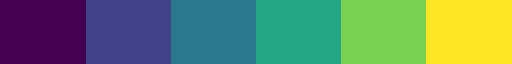

In [16]:
# Set color palette 
vcmap = plt.get_cmap("viridis", 6)

# Displays the color map
display(vcmap)

The color map will be converted into a vector in order to enable the use of colors in an individualized way. Furthermore, some customizations will be applied to the visualization, in order to enhance its aesthetics and usability.

In [17]:
# Converts the color map into a vector for individual use and extracts the list of colors in hex
viridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)]
display(viridis)

# Setting a default color as the second color of the palette
defaultcolor = viridis[1]

# Load a style sheet for optimized design
plt.style.use("ggplot")

# Modifies some more graphic parameters for optimized design
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)


['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

### 3.2 Understanding the profile of the interviewees

A histogram will be used to analyze the age range of the passengers. It is worth noting that the histogram is a useful tool for visualizing the shape of the data distribution and identifying possible patterns or anomalies.

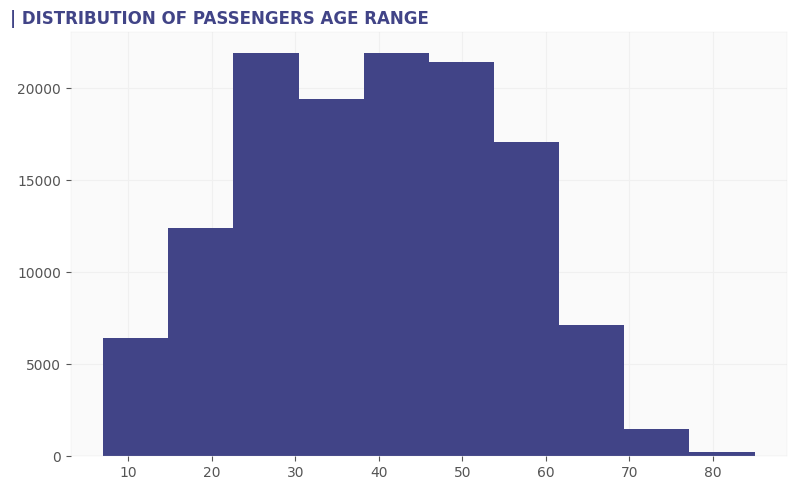

In [18]:
# Histogram
df.Age.hist(figsize=(8,5),
            color=defaultcolor)

# Adds a title to the plot
plt.title('| DISTRIBUTION OF PASSENGERS AGE RANGE',
          fontsize='large',
          fontweight="bold",
          color='#414487',
          horizontalalignment='right')

# Plot the graph
plt.tight_layout()
plt.show()

>The number of respondents between 7 and 19 years old is relatively high. However, the majority of respondents are in the 20 to 40 age range, which may suggest that this age group is more likely to use airline services.
>
>It is interesting to note that the number of respondents decreases dramatically after 50 years old, which may indicate that this age group travels less by plane or is less likely to participate in satisfaction surveys.

It is possible also to check the loyalty index of the passengers, as well as their preferences for travel type and class.

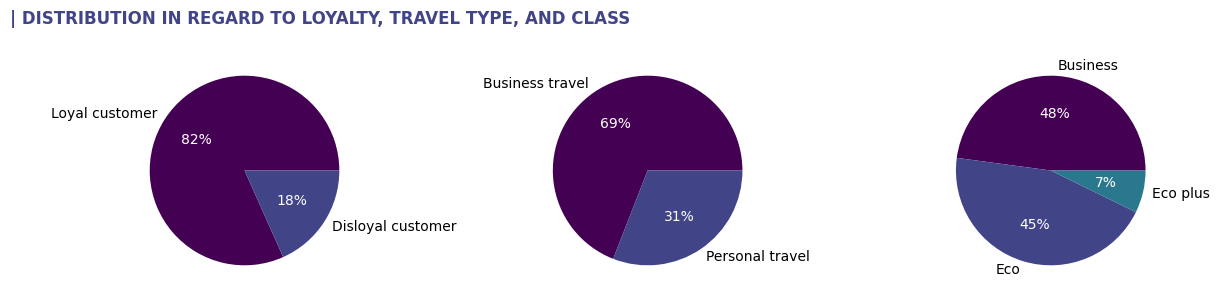

In [19]:
# Configures the display layout
fig, ax = plt.subplots(figsize=(12,3),
                       nrows=1,
                       ncols=3)

## Pie chart to show distribution of the CustomerType attribute
# Defines attribute values to be considered
labels1 = df['CustomerType'].value_counts().index.str.capitalize()
values1 = df['CustomerType'].value_counts().values

# Creates the chart
patches, texts, autotexts = ax[0].pie(values1,
                                      autopct='%.0f%%',
                                      labels=labels1,
                                      colors=viridis)

# Adjusts the color of the percentage values
for ins in autotexts:
    ins.set_color('white')


# Pie chart to show distribution of the TypeTravel attribute
# Defines attribute values to be considered
labels2 = df['TypeTravel'].value_counts().index.str.capitalize()
values2 = df['TypeTravel'].value_counts().values

# Creates the chart
patches, texts, autotexts = ax[1].pie(values2,
                                      autopct='%.0f%%',
                                      labels=labels2,
                                      colors=viridis)

# Adjusts the color of the percentage values
for ins in autotexts:
    ins.set_color('white')


# Pie chart to show distribution of the Class attribute
# Defines attribute values to be considered
labels3 = df['Class'].value_counts().index.str.capitalize()
values3 = df['Class'].value_counts().values

# Creates the chart
patches, texts, autotexts = ax[2].pie(values3,
                                      autopct='%.0f%%',
                                      labels=labels3,
                                      colors=viridis)

# Adjusts the color of the percentage values
for ins in autotexts:
    ins.set_color('white')


# Adds a title to the chart
plt.suptitle('| DISTRIBUTION IN REGARD TO LOYALTY, TRAVEL TYPE, AND CLASS',
             fontsize='large',
             fontweight="bold",
             color='#414487',
             horizontalalignment='right')


# Plots the chart
plt.tight_layout()
plt.show()

>The high percentage of loyal customers (82%) suggests that most respondents are satisfied with the services and products offered.
>
>Furthermore, the data indicates a strong presence in the business travel market, which accounts for 69% of the total.
>
>The distribution of travel classes suggests a preference for business (48%) and economy (45%) classes. 
>
>The Economy Plus class, on the other hand, doesn't seem to be as popular among passengers, accounting for only 7%. Having this information is important to identify bottlenecks and unnecessary or inefficient processes that may negatively impact the customer experience.

It is interesting to verify the relationship between the passenger's age and their choice of travel class.

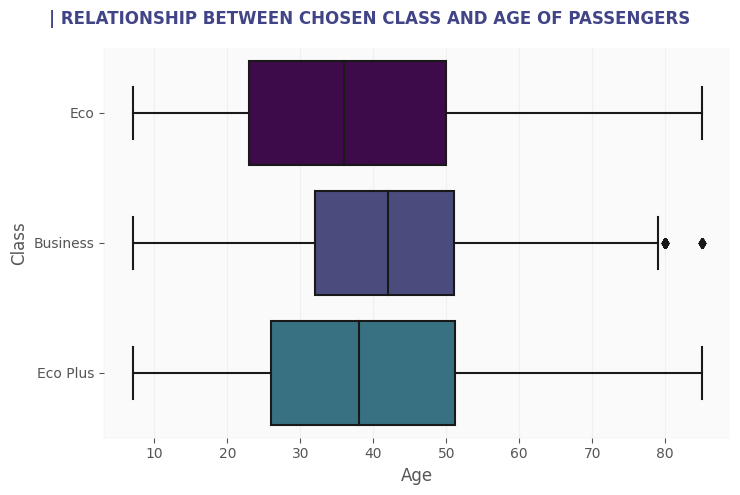

In [20]:
# Creates boxplot graph
sns.catplot(x='Age',
            y='Class',
            data=df,
            kind='box',
            height=5,
            aspect=1.5,
            palette=viridis)

# Adds a title to the graph
plt.suptitle('| RELATIONSHIP BETWEEN CHOSEN CLASS AND AGE OF PASSENGERS',
             fontsize='large',
             fontweight="bold",
             color='#414487',
             horizontalalignment='center')

# Plots the graph
plt.tight_layout()
plt.show()

>The majority of business class customers are concentrated in the age group of 35 to 50, which may be explained by the fact that there are more active professionals in this age group.
>
>In addition, the data shows that older people have a slight preference for Eco Plus class. This information can be useful for the airline to develop customized products and services that meet the needs of different consumer profiles.

### 3.3 Understanding the relationship between data

In exploratory data analysis, understanding how one variable behaves in relation to another can be the key point to extract valuable insights.

In this sense, the distribution of evaluations for each attribute of the survey will be explored.

Since the attributes are in separate columns, a new dataset will be created with these columns transformed into rows for a more optimized graphical analysis.

In [21]:
# Create a list with the attributes
attributes = ['Seatcomfort','DepartureArrivalTimeConvenient','FoodDrink','GateLocation','InflightWifiService','InflightEntertainment','OnlineSupport','EaseOnlinebooking','OnboardService','LegRoomService','BaggageHandling','CheckinService','Cleanliness','OnlineBoarding']

# Create a dataset with the selected attributes
df2 = df[attributes]

# Transform columns into rows
df2 = df2.melt(var_name='Attribute', 
               value_name='Evaluation')

df2.tail(10)

,Attribute,Evaluation
1812808,OnlineBoarding,1.0
1812809,OnlineBoarding,5.0
1812810,OnlineBoarding,2.0
1812811,OnlineBoarding,4.0
1812812,OnlineBoarding,2.0
1812813,OnlineBoarding,2.0
1812814,OnlineBoarding,1.0
1812815,OnlineBoarding,2.0
1812816,OnlineBoarding,2.0
1812817,OnlineBoarding,3.0


With the data properly organized, the graph can be generated.

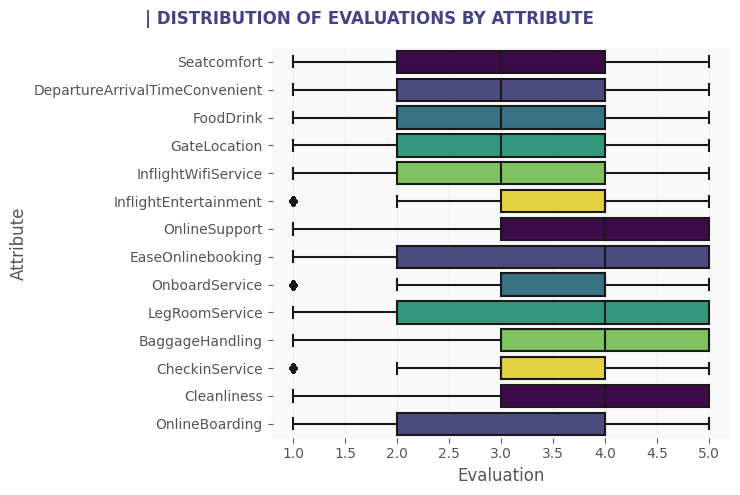

In [22]:
# Create a boxplot graph
sns.catplot(x='Evaluation',
            y='Attribute',
            data=df2,
            kind='box',
            height=5,
            aspect=1.5,
            palette=viridis)

# Add a title to the graph
plt.suptitle('| DISTRIBUTION OF EVALUATIONS BY ATTRIBUTE',
             fontsize='large',
             fontweight="bold",
             color='#414487',
             horizontalalignment='center')

# Plot the graph
plt.tight_layout()
plt.show()

>At first, the data suggests that Online Support, Baggage Handling, and Cleanliness are key attributes because they have a higher concentration of scores greater than or equal to 4.
>
>However, it is worth noting that the final Satisfaction rating should be considered for a more accurate analysis, which will be addressed below.



In order to identify which attributes have the greatest influence on passengers' overall satisfaction perception, the relationship between the **maximum satisfaction rating (score 5)** for each attribute and the **passengers' overall satisfaction rating** will be analyzed.

Firstly, only the relevant columns will need to be selected.

In [23]:
# Create a list with the necessary columns for analysis
col3 = ['Satisfaction','Seatcomfort','DepartureArrivalTimeConvenient','FoodDrink','GateLocation','InflightWifiService','InflightEntertainment','OnlineSupport','EaseOnlinebooking','OnboardService','LegRoomService','BaggageHandling','CheckinService','Cleanliness','OnlineBoarding']

# Create a dataset with the selected attributes
df3 = df[col3]

# Transform columns into rows
df3 = df3.melt(id_vars=['Satisfaction'],
               var_name='Attribute',
               value_name='Evaluation')

df3.tail(10)

,Satisfaction,Attribute,Evaluation
1812808,satisfied,OnlineBoarding,1.0
1812809,satisfied,OnlineBoarding,5.0
1812810,satisfied,OnlineBoarding,2.0
1812811,satisfied,OnlineBoarding,4.0
1812812,satisfied,OnlineBoarding,2.0
1812813,satisfied,OnlineBoarding,2.0
1812814,neutral or dissatisfied,OnlineBoarding,1.0
1812815,neutral or dissatisfied,OnlineBoarding,2.0
1812816,neutral or dissatisfied,OnlineBoarding,2.0
1812817,neutral or dissatisfied,OnlineBoarding,3.0


With the appropriate columns selected, only the results with the maximum evaluation (rating 5) will be filtered.

In [24]:
# Filter rating = 5
df3 = df3[df3['Evaluation'] == 5]

df3.tail(10)

,Satisfaction,Attribute,Evaluation
1812777,neutral or dissatisfied,OnlineBoarding,5.0
1812787,neutral or dissatisfied,OnlineBoarding,5.0
1812789,neutral or dissatisfied,OnlineBoarding,5.0
1812791,neutral or dissatisfied,OnlineBoarding,5.0
1812793,neutral or dissatisfied,OnlineBoarding,5.0
1812794,neutral or dissatisfied,OnlineBoarding,5.0
1812796,neutral or dissatisfied,OnlineBoarding,5.0
1812799,neutral or dissatisfied,OnlineBoarding,5.0
1812806,satisfied,OnlineBoarding,5.0
1812809,satisfied,OnlineBoarding,5.0


After correctly filtering the data, the Score column is no longer necessary since it will always have the same number. Therefore, it will be deleted.

In [25]:
# Remove rating column
df3 = df3.drop(['Evaluation'],
               axis=1)

df3.tail(10)

,Satisfaction,Attribute
1812777,neutral or dissatisfied,OnlineBoarding
1812787,neutral or dissatisfied,OnlineBoarding
1812789,neutral or dissatisfied,OnlineBoarding
1812791,neutral or dissatisfied,OnlineBoarding
1812793,neutral or dissatisfied,OnlineBoarding
1812794,neutral or dissatisfied,OnlineBoarding
1812796,neutral or dissatisfied,OnlineBoarding
1812799,neutral or dissatisfied,OnlineBoarding
1812806,satisfied,OnlineBoarding
1812809,satisfied,OnlineBoarding


With the data properly treated, a command can be used to show the percentage of responses for passengers' final satisfaction, being "Satisfied" or "Neutral or Dissatisfied".

In [26]:
# Create a cross table with the proportion of each result
df3 = pd.crosstab(index=df3['Attribute'],
                  columns=df3['Satisfaction'],
                  normalize="index")*100
df3

Satisfaction,neutral or dissatisfied,satisfied
Attribute,,
BaggageHandling,26.418325,73.581675
CheckinService,26.423716,73.576284
Cleanliness,26.830154,73.169846
DepartureArrivalTimeConvenient,44.355050,55.644950
EaseOnlinebooking,23.450079,76.549921
FoodDrink,21.991619,78.008381
GateLocation,34.452066,65.547934
InflightEntertainment,4.793600,95.206400
InflightWifiService,33.088593,66.911407


The "Neutral or Dissatisfied" result will be removed from the table as it is not necessary for analysis.

The values will also be sorted in descending order, so that the main attributes are at the top.

In [27]:
# Eliminate "Neutral or Dissatisfied" column
df3 = df3.drop(['neutral or dissatisfied'],
               axis=1)

# Sort data in descending order
df3 = df3.sort_values('satisfied',
                      ascending=False)

# Adjusting decimal places
df3 = df3.round(0)

df3

Satisfaction,satisfied
Attribute,
Seatcomfort,99.0
InflightEntertainment,95.0
FoodDrink,78.0
OnlineSupport,77.0
OnboardService,77.0
EaseOnlinebooking,77.0
BaggageHandling,74.0
CheckinService,74.0
OnlineBoarding,73.0


With the data ready, a custom formatted table can be created to easily identify the most significant attributes.

>**Note: To see the formatted table, open it through Colab.**

In [29]:
# Define color map
cm = plt.get_cmap("viridis_r")

# Configure table using CSS to assign gradient background to the results column
th_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('color', 'black'),
  ('background-color', '#f7f7f9')
  ]

td_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('width', '5px'),
  ]

caption_props = [
    ("text-align", "left"),
    ("font-size", "15px"),
    ("font-weight", "bold"),
    ('color', '#414487')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=caption_props)
  ]

# Display table
(df3.style 
  .background_gradient(cmap=cm, subset=['satisfied'])
  .set_caption("| PERCENTAGE OF PASSENGERS' END SATISFACTION WHO EVALUATED THE LISTED ATTRIBUTES WITH MAXIMUM RATING")
  .set_table_styles(styles))

Satisfaction,satisfied
Attribute,
Seatcomfort,99.000000
InflightEntertainment,95.000000
FoodDrink,78.000000
OnlineSupport,77.000000
OnboardService,77.000000
EaseOnlinebooking,77.000000
BaggageHandling,74.000000
CheckinService,74.000000
OnlineBoarding,73.000000


>The analysis of the results shows that positive ratings for certain attributes have a great impact on passengers' end satisfaction.
>
>For example, **99% of people who rated Seat Comfort as excellent** (rating 5) and **95% of those who gave the same score for In-Flight Entertainment** classified their **overall experience as satisfactory**.
>
>This data can be extremely useful in developing products and services that meet these needs, allowing focus on actions that are more likely to generate a positive return, and thus optimize costs and resources.
>
>In addition, it helps create a more satisfying and pleasant experience for the customer. This can lead to positive ratings, feedback, and comments, which certainly helps build a positive reputation for the company.
>
>Moreover, positive ratings for **Food and Beverage, Online Support, In-Flight Service, and Ease of Online Booking** were quite representative, which reinforces the importance of these aspects for customers. Therefore, it is possible to guide future actions and adequately prioritize the most relevant attributes to enhance passengers' experience.

## 4. Conclusion
---
Main insights obtained through the study.


---



In an era where the amount of generated data is increasingly growing, it is crucial to know how to use it to build solutions with high added value and optimized costs.

In this context, the objective of this MVP was to perform an exploratory analysis of data from a satisfaction survey about the air travel experience of passengers.

Through this analysis, characteristics related to passengers' age range, as well as the most frequent type and class of travel were identified.

The most relevant insight was the identification of the attributes that most influence the final satisfaction of the passenger, which was the main objective of the study. This information is essential so that decisions can be made in the correct order of priority, optimizing resources and costs, as well as achieving customer satisfaction.

For future studies, the analysis can be expanded to investigate how these results vary in relation to other attributes, such as passengers' age and flight distance, for example. This information can be used as input to create even more personalized solutions, allowing for customer service more suited to their specific needs.